# 14/11/22


# **Deep Learning**


Deep learning is usage of ANN to perform prediction on highly complex data


In [50]:
# ! pip install tensorflow


In [51]:
import tensorflow as tf


# 15/11/22


parts of neural networks

1. Input layer
2. Hidden layer
3. Output layer

Layer is set of neurons or tensor or units

neuron consists of activation function and maps it to specific output range

next hidden layes contains neurons less than half of previous layer

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd

df = pd.read_csv('./Churn_Modelling.csv')
# df

# print(df.isna().sum())

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
# df

y = df['Exited']
X = df.drop(columns='Exited')
# X

# print(X.dtypes)

# Gender

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
# X

# print(X['Geography'].value_counts())
# Geography

ct = ColumnTransformer(
    [('encode', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

sc = StandardScaler()
X = sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)


In [53]:
X_train.shape


(8000, 12)

types of nn

1. Feed forward
2. Recurrent
3. Convolutional

types of 

1. sequential
2. non sequential

sigmoid function: 1+1/(1+e^-x)


x is input<br>
tells us the probability of true class


Graph of sigmoid function is S shaped


Types of activation functions
1. Sigmoid
2. Softmax: formula is e^x/sum(e^x) for all x: Softmax is used for multi class classification

3. ReLU (rectified linear unit) (most used) : max(0,x) (x is input) 
4. ELU (exponential linear unit)
5. tanh (hyperbolic tangent)
6. Leaky ReLU 
7. Softplus

In [54]:
ann=tf.keras.models.Sequential()
# input layer
ann.add(tf.keras.layers.Input(shape=12))
# 1st hidden layer
ann.add(tf.keras.layers.Dense(units=200,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=150,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

# output layer

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


**Note:**

1. Which function to use in hidden layes
mostly relu, tanh, elu

2. Which function to use in output layer
a. if regression then use relu or tanh
b. if classification then use softmax(multi-class classification), sigmoid(binary classification)

use softmax when both categoreis are independent of each other 

# 16/11/22

Disadvantages of relu
no negative values


In [55]:
# ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# history=ann.fit(X_train,y_train,epochs=50,batch_size=32)

# history=history.history

- Batch Size: number of samples given to neural network at a time to find loss and optimize
- Epoch: number of times our neural network will be trained on entire dataset

optimization function
1. adam
2. rmsprop (root mean square prop)
3. SGD (stochastic gradient descent)
4. autodelta
5. Nadam

binary cross entropy when output is binary classification
catagorical cross entropy when output is multi class classification

mean squared error,mean Absolute error when output is regression

In [56]:
# y_pred= ann.predict(X_test)
# type(y_pred)

In [57]:
import numpy as np

# y_pred=np.array([1 if i >=0.5 else 0 for i in y_pred])

In [58]:
# y_pred=np.where(y_pred>0.5,1,0)

In [59]:
# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_test,y_pred))

In [60]:
# y_pred[y_pred>=0.5]=1
# y_pred[y_pred<0.5]=0

Validation: 


In [61]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=ann.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

history=history.history

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8170 - val_loss: 0.3605 - val_accuracy: 0.8630
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8489 - val_loss: 0.3536 - val_accuracy: 0.8610
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8600 - val_loss: 0.3572 - val_accuracy: 0.8500
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8569 - val_loss: 0.3464 - val_accuracy: 0.8620
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8590 - val_loss: 0.3368 - val_accuracy: 0.8655
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8614 - val_loss: 0.3370 - val_accuracy: 0.8635
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8616 - val_loss: 0.3375 - val_accuracy: 0.8595

In [62]:
y_pred = ann.predict(X_test)

y_pred=np.where(y_pred>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


Text(0, 0.5, 'loss')

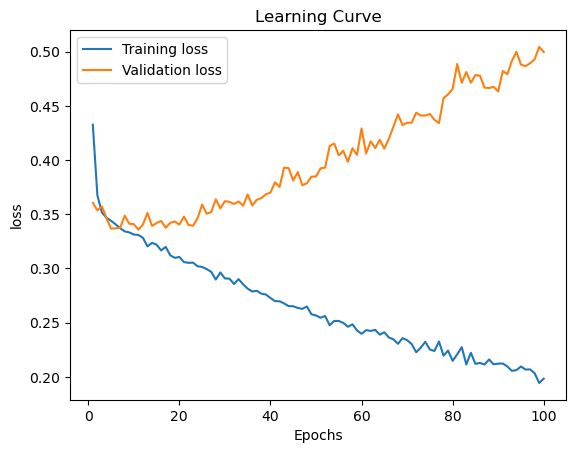

In [63]:
from matplotlib import pyplot as plt

plt.plot(range(1,101),history['loss'])
plt.plot(range(1,101),history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('loss')

Regularizarion parameter

In [ ]:
# 

Varience and Bias

Varience is variety of data learned by our model 

bias is assumption made by our model

- Overfitting when varience is high and bias is low, when model is trained on training data and performs well on training data but not on test data
- Underfitting when varience is low and bias is high, when model is trained on training data and performs poorly on training data and test data